In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel(r"C:\Users\Amrit Krishn\FlightData\FlightData_Train.xlsx")

In [3]:
df.shape

(10683, 11)

In [4]:
test_data=pd.read_excel(r"C:\Users\Amrit Krishn\FlightData\FlightTest_set.xlsx")

In [5]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [6]:
# df = pd.concat([train_df, test_df], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


<Axes: >

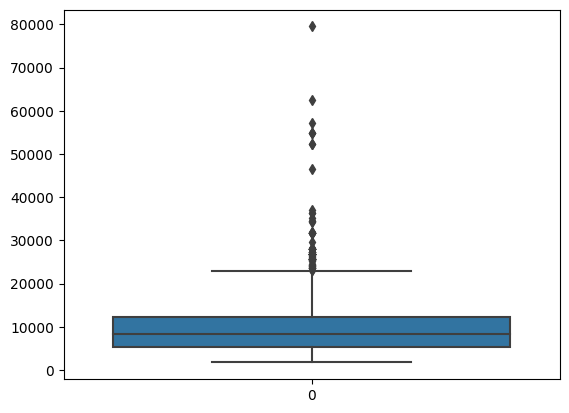

In [7]:
df.shape
import seaborn as sns
sns.boxplot(df['Price'])


<Axes: >

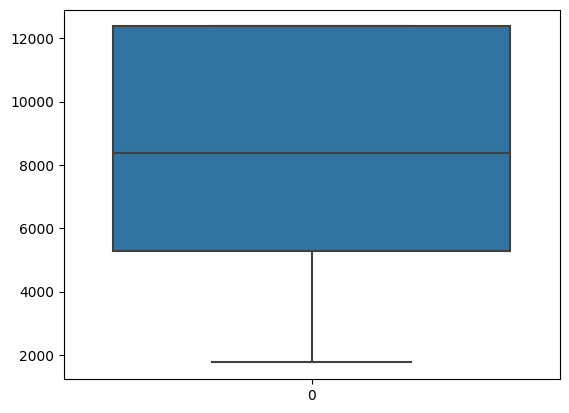

In [8]:
upper_limit = np.percentile(df['Price'], 75)
data_capped = np.minimum(df['Price'], upper_limit)

# df.columns
data_capped
df['Price']=data_capped
sns.boxplot(df['Price'])
# df['Price']

In [9]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [10]:
## Feature Engineering Process
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,12373.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,12373.0,01,03,2019


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Date_of_Journey  10683 non-null  object 
 2   Source           10683 non-null  object 
 3   Destination      10683 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10683 non-null  object 
 6   Arrival_Time     10683 non-null  object 
 7   Duration         10683 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10683 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             10683 non-null  object 
 12  Month            10683 non-null  object 
 13  Year             10683 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.1+ MB


In [13]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Date_of_Journey  10683 non-null  object 
 2   Source           10683 non-null  object 
 3   Destination      10683 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10683 non-null  object 
 6   Arrival_Time     10683 non-null  object 
 7   Duration         10683 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10683 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             10683 non-null  int32  
 12  Month            10683 non-null  int32  
 13  Year             10683 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.0+ MB


In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,12373.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,12373.0,1,3,2019


In [16]:
df.drop('Date_of_Journey',axis=1,inplace=True)


In [17]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,12373.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,12373.0,1,3,2019


In [18]:
df['A_time']=df['Arrival_Time'].str.split(' ').str[0]
print(df['A_time'])

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: A_time, Length: 10683, dtype: object


In [19]:
df['A_time_hour']=df['A_time'].str.split(':').str[0]
df['A_time_min']=df['A_time'].str.split(':').str[1]


In [20]:
df.drop(['Arrival_Time'],axis=1,inplace=True)
df.drop(['A_time'],axis=1,inplace=True)

In [21]:
df.tail()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,A_time_hour,A_time_min
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,2h 30m,non-stop,No info,4107.0,9,4,2019,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,2h 35m,non-stop,No info,4145.0,27,4,2019,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,3h,non-stop,No info,7229.0,27,4,2019,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,2h 40m,non-stop,No info,12373.0,1,3,2019,14,10
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,8h 20m,2 stops,No info,11753.0,9,5,2019,19,15


In [22]:
df['A_time_hour']=df['A_time_hour'].astype(int)
df['A_time_min']=df['A_time_min'].astype(int)


In [23]:
df['Dep_Time']=df['Dep_Time'].str.split(' ').str[0]
df['Dep_Time_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_Time_min']=df['Dep_Time'].str.split(':').str[1]

In [24]:
df.drop(['Dep_Time'],axis=1,inplace=True)


In [25]:
df['Dep_Time_hour']=df['Dep_Time_hour'].astype(int)

In [26]:
df['Dep_Time_min']=df['Dep_Time_min'].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Source           10683 non-null  object 
 2   Destination      10683 non-null  object 
 3   Route            10682 non-null  object 
 4   Duration         10683 non-null  object 
 5   Total_Stops      10682 non-null  object 
 6   Additional_Info  10683 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             10683 non-null  int32  
 9   Month            10683 non-null  int32  
 10  Year             10683 non-null  int32  
 11  A_time_hour      10683 non-null  int32  
 12  A_time_min       10683 non-null  int32  
 13  Dep_Time_hour    10683 non-null  int32  
 14  Dep_Time_min     10683 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 959.9+ KB


In [28]:

df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [29]:

df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [30]:

df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'2 stops':2,'1 stop':1, '3 stops':3,'4 stops':4,'nan':1})

In [31]:

df.groupby(['Total_Stops']).size().reset_index()

,Total_Stops,0
0,0,3491
1,1,5626
2,2,1520
3,3,45
4,4,1


In [32]:

df['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [33]:

df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
A_time_hour        0
A_time_min         0
Dep_Time_hour      0
Dep_Time_min       0
dtype: int64

In [34]:

df['Duration_hour']=df['Duration'].str.split('h').str[0]

In [35]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,A_time_hour,A_time_min,Dep_Time_hour,Dep_Time_min,Duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,12373.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,12373.0,1,3,2019,21,35,16,50,4


In [36]:
#df['Duration_hour']=df['Duration_hour'].astype(int)

In [37]:
df[df['Duration']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,A_time_hour,A_time_min,Dep_Time_hour,Dep_Time_min,Duration_hour
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2,No info,12373.0,6,3,2019,16,55,16,50,5m


In [38]:
df.drop(6474,axis=0,inplace=True)
# df.drop(13343,axis=0,inplace=True)

In [39]:
df.iloc[2660]
# df[df['Duration_min']=='']

Airline                      Jet Airways
Source                             Delhi
Destination                       Cochin
Route              DEL → IDR → BOM → COK
Duration                             27h
Total_Stops                            2
Additional_Info                  No info
Price                            12373.0
Date                                  12
Month                                  6
Year                                2019
A_time_hour                           12
A_time_min                            35
Dep_Time_hour                          9
Dep_Time_min                          35
Duration_hour                         27
Name: 2660, dtype: object

In [40]:
df['Duration_hour']=df['Duration_hour'].astype(int)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Route            10681 non-null  object 
 4   Duration         10682 non-null  object 
 5   Total_Stops      10682 non-null  int64  
 6   Additional_Info  10682 non-null  object 
 7   Price            10682 non-null  float64
 8   Date             10682 non-null  int32  
 9   Month            10682 non-null  int32  
 10  Year             10682 non-null  int32  
 11  A_time_hour      10682 non-null  int32  
 12  A_time_min       10682 non-null  int32  
 13  Dep_Time_hour    10682 non-null  int32  
 14  Dep_Time_min     10682 non-null  int32  
 15  Duration_hour    10682 non-null  int32  
dtypes: float64(1), int32(8), int64(1), object(6)
memory usage: 1.1+

In [42]:
df['Duration_min_i']=df['Duration'].str.split('h').str[1]

In [43]:
#df['Duration_min']=df['Duration_min'].astype(int)

In [44]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,A_time_hour,A_time_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min_i
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,12373.0,9,6,2019,4,25,9,25,19,
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,5,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,12373.0,1,3,2019,21,35,16,50,4,45m


In [45]:
df['Duration_min']=df['Duration_min_i'].str.split('m').str[0]

In [46]:
# if df[df['Duration_min']=='']:
#     df['Duration_min']=df['Duration_min'].fillna(0)
df['Duration_min'] = df['Duration_min'].replace('', 10)

df[df['Duration_min']=='']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,A_time_hour,A_time_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min_i,Duration_min


In [47]:
df['Duration_min']=df['Duration_min'].astype(int)

In [48]:
df['Duration_min'].isnull().sum()

0

In [49]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,A_time_hour,A_time_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min_i,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2,50m,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7,25m,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,12373.0,9,6,2019,4,25,9,25,19,,10
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,5,25m,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,12373.0,1,3,2019,21,35,16,50,4,45m,45


In [50]:
df['Duration_min']=df['Duration_min'].astype(int)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Route            10681 non-null  object 
 4   Duration         10682 non-null  object 
 5   Total_Stops      10682 non-null  int64  
 6   Additional_Info  10682 non-null  object 
 7   Price            10682 non-null  float64
 8   Date             10682 non-null  int32  
 9   Month            10682 non-null  int32  
 10  Year             10682 non-null  int32  
 11  A_time_hour      10682 non-null  int32  
 12  A_time_min       10682 non-null  int32  
 13  Dep_Time_hour    10682 non-null  int32  
 14  Dep_Time_min     10682 non-null  int32  
 15  Duration_hour    10682 non-null  int32  
 16  Duration_min_i   10682 non-null  object 
 17  Duration_min     

In [52]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [53]:
test_data.shape

(2671, 10)

In [54]:
df[df['Additional_Info']=='No info'].shape

(8344, 18)

In [55]:
is_nominal = df['Destination'].nunique() == len(df['Destination'])
print(f"Is 'Color' nominal? {is_nominal}")

Is 'Color' nominal? False


In [56]:
Source =df['Source']
Source = pd.get_dummies(Source,drop_first=True)
Source.head()
# df['Source'].unique()

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [57]:
# Source = train_data[["Source"]]

# Source = pd.get_dummies(Source, drop_first= True)

# Source.head()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Route            10681 non-null  object 
 4   Duration         10682 non-null  object 
 5   Total_Stops      10682 non-null  int64  
 6   Additional_Info  10682 non-null  object 
 7   Price            10682 non-null  float64
 8   Date             10682 non-null  int32  
 9   Month            10682 non-null  int32  
 10  Year             10682 non-null  int32  
 11  A_time_hour      10682 non-null  int32  
 12  A_time_min       10682 non-null  int32  
 13  Dep_Time_hour    10682 non-null  int32  
 14  Dep_Time_min     10682 non-null  int32  
 15  Duration_hour    10682 non-null  int32  
 16  Duration_min_i   10682 non-null  object 
 17  Duration_min     

In [59]:
Airline = df['Airline']
Airline= pd.get_dummies(Airline,drop_first=True)
Destination  = df['Destination']
Destination = pd.get_dummies(Destination,drop_first=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Route            10681 non-null  object 
 4   Duration         10682 non-null  object 
 5   Total_Stops      10682 non-null  int64  
 6   Additional_Info  10682 non-null  object 
 7   Price            10682 non-null  float64
 8   Date             10682 non-null  int32  
 9   Month            10682 non-null  int32  
 10  Year             10682 non-null  int32  
 11  A_time_hour      10682 non-null  int32  
 12  A_time_min       10682 non-null  int32  
 13  Dep_Time_hour    10682 non-null  int32  
 14  Dep_Time_min     10682 non-null  int32  
 15  Duration_hour    10682 non-null  int32  
 16  Duration_min_i   10682 non-null  object 
 17  Duration_min     

In [60]:
df = pd.concat([df, Airline,Source,Destination], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Airline                            10682 non-null  object 
 1   Source                             10682 non-null  object 
 2   Destination                        10682 non-null  object 
 3   Route                              10681 non-null  object 
 4   Duration                           10682 non-null  object 
 5   Total_Stops                        10682 non-null  int64  
 6   Additional_Info                    10682 non-null  object 
 7   Price                              10682 non-null  float64
 8   Date                               10682 non-null  int32  
 9   Month                              10682 non-null  int32  
 10  Year                               10682 non-null  int32  
 11  A_time_hour                        10682 non-null  int32  


In [61]:
df.drop(['Airline','Source'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Destination                        10682 non-null  object 
 1   Route                              10681 non-null  object 
 2   Duration                           10682 non-null  object 
 3   Total_Stops                        10682 non-null  int64  
 4   Additional_Info                    10682 non-null  object 
 5   Price                              10682 non-null  float64
 6   Date                               10682 non-null  int32  
 7   Month                              10682 non-null  int32  
 8   Year                               10682 non-null  int32  
 9   A_time_hour                        10682 non-null  int32  
 10  A_time_min                         10682 non-null  int32  
 11  Dep_Time_hour                      10682 non-null  int32  


In [62]:
df.drop(['Destination','Route','Duration','Additional_Info','Duration_min_i'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Stops                        10682 non-null  int64  
 1   Price                              10682 non-null  float64
 2   Date                               10682 non-null  int32  
 3   Month                              10682 non-null  int32  
 4   Year                               10682 non-null  int32  
 5   A_time_hour                        10682 non-null  int32  
 6   A_time_min                         10682 non-null  int32  
 7   Dep_Time_hour                      10682 non-null  int32  
 8   Dep_Time_min                       10682 non-null  int32  
 9   Duration_hour                      10682 non-null  int32  
 10  Duration_min                       10682 non-null  int32  
 11  Air India                          10682 non-null  bool   


In [63]:
# train_df.shape
# df.shape

In [64]:
# df_train = df.iloc[:10682]
# df_train

In [65]:
# df_test = df.iloc[10682:13352]
# df_test

In [66]:
df.shape


(10682, 31)

In [67]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

C:\Users\Amrit Krishn\AppData\Local\Temp\ipykernel_15284\1846350894.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
C:\Users\Amrit Krishn\AppData\Local\Temp\ipykernel_15284\1846350894.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
C:\Users\Amrit Krishn\AppData\Local\Temp\ipykernel_15284\1846350894.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
C

Airline
---------------------------------------------------------------------------
Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: count, dtype: int64

Source
---------------------------------------------------------------------------
Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: count, dtype: int64

Destination
---------------------------------------------------------------------------
Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: count, dtype: 

C:\Users\Amrit Krishn\AppData\Local\Temp\ipykernel_15284\1846350894.py:80: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


<Axes: >

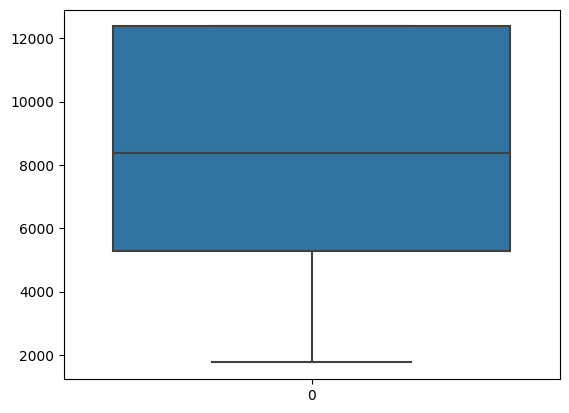

In [68]:
import seaborn as sns
sns.boxplot(df['Price'])

In [69]:
X = df.loc[:,['Total_Stops', 'Date', 'Month', 'Year', 'A_time_hour',
       'A_time_min', 'Dep_Time_hour', 'Dep_Time_min', 'Duration_hour',
       'Duration_min', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi']]
y = df.iloc[:,1]
X
# df.columns

,Total_Stops,Date,Month,Year,A_time_hour,A_time_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min,...,Kolkata,Kolkata,Mumbai,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi
0,0,24,3,2019,1,10,22,20,2,50,...,False,False,False,False,False,False,False,False,False,True
1,2,1,5,2019,13,15,5,50,7,25,...,True,False,False,False,False,False,False,True,False,False
2,2,9,6,2019,4,25,9,25,19,10,...,False,False,False,True,True,False,False,False,False,False
3,1,12,5,2019,23,30,18,5,5,25,...,True,False,False,False,False,False,False,True,False,False
4,1,1,3,2019,21,35,16,50,4,45,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,2019,22,25,19,55,2,30,...,True,False,False,False,False,False,False,True,False,False
10679,0,27,4,2019,23,20,20,45,2,35,...,True,False,False,False,False,False,False,True,False,False
10680,0,27,4,2019,11,20,8,20,3,10,...,False,False,False,False,False,True,False,False,False,False
10681,0,1,3,2019,14,10,11,30,2,40,...,False,False,False,False,False,False,False,False,False,True


In [70]:
df.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'A_time_hour',
       'A_time_min', 'Dep_Time_hour', 'Dep_Time_min', 'Duration_hour',
       'Duration_min', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [72]:
y_train

8455      5883.0
8424      7202.0
10179    10696.0
3880     10844.0
6176     12373.0
          ...   
5734     12242.0
5191     10844.0
5390      7670.0
860       6144.0
7271      5678.0
Name: Price, Length: 7156, dtype: float64

In [73]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [74]:
y_pred = reg.predict(X_test)

In [75]:
y_pred

array([12369.16      ,  5794.37      ,  8977.59      , ...,
        9396.16      , 12008.37666667, 10404.68      ])

In [76]:
reg.score(X_test,y_test)

0.8606113509732789

In [77]:
from sklearn import metrics

In [78]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 771.1557721185508
MSE: 1498914.9635999636
RMSE: 1224.3018270018074


In [79]:
metrics.r2_score(y_test, y_pred)

0.8606113509732789

In [80]:
##Hyperparameter Tuning 


In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [83]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [84]:
rf_random = RandomizedSearchCV(estimator = reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [85]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  16.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   9.2s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   9.1s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   8.8s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   9.1s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   8.8s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  17.4s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  17.5s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  17.2s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  17.3s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  18.8s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  25.6s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  26.5s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  25.5s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  26.1s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  25.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  26.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  27.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  22.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  28.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  27.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   8.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   7.9s
[CV] END max_depth=5, max_feat

C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  31.6s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  31.8s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  30.6s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  31.3s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  31.3s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [86]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [87]:
prediction = rf_random.predict(X_test)

In [88]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 785.9555275747887
MSE: 1335485.5548827813
RMSE: 1155.6321018744595


In [89]:
metrics.r2_score(y_test,prediction)

0.8758091474097174

In [90]:
##using ANN

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [92]:
Regressor = Sequential()

In [93]:
Regressor.add(Dense(units=11,activation = 'relu'))
Regressor.add(Dropout(0.2))

In [94]:
#1st HL
Regressor.add(Dense(units=7,activation ='relu'))
Regressor.add(Dropout(0.2))

In [95]:
#2nd HL
Regressor.add(Dense(units=6,activation='relu'))
Regressor.add(Dropout(0.2))

In [96]:
##output layer
Regressor.add(Dense(units=1,activation='linear'))

In [98]:
import tensorflow as tf
Regressor.compile(optimizer='adam',loss=tf.keras.losses.Huber(delta=1.5),metrics=['accuracy'])

In [100]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
Regressor.compile(optimizer=opt,loss=tf.keras.losses.Huber(delta=1.5),metrics=['mae'])

In [101]:
##early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [102]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_train.shape

(7156, 34)

In [103]:
model_history = Regressor.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000, callbacks=early_stopping)

Epoch 1/1000
480/480 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 8910.1787 - mae: 5940.8687 - val_loss: 5106.4707 - val_mae: 3405.0645
Epoch 2/1000
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5598.0015 - mae: 3732.7517 - val_loss: 5369.9800 - val_mae: 3580.7363
Epoch 3/1000
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5330.9463 - mae: 3554.7129 - val_loss: 5997.1909 - val_mae: 3998.8765
Epoch 4/1000
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5056.3008 - mae: 3371.6174 - val_loss: 4351.2627 - val_mae: 2901.5918
Epoch 5/1000
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4711.3433 - mae: 3141.6465 - val_loss: 5161.1763 - val_mae: 3441.5339
Epoch 6/1000
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4839.4829 - mae: 3227.0725 - val_loss: 4569.6138 - val_mae: 3047.1592
Epoch 7/1000
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4710.5303 - mae: 3141.1038 - val_loss: 5813.4316 - val_mae: 3876.3721
Epoch 8/1000
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4781.8726 - ma

480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3737.1699 - mae: 2492.1963 - val_loss: 3676.8413 - val_mae: 2451.9768
Epoch 51/1000
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3786.2285 - mae: 2524.9031 - val_loss: 4953.2710 - val_mae: 3302.9297
Epoch 52/1000
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3835.6296 - mae: 2557.8369 - val_loss: 3604.1169 - val_mae: 2403.4949
Epoch 53/1000
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3840.6648 - mae: 2561.1931 - val_loss: 3745.4736 - val_mae: 2497.7329
Epoch 54/1000
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3984.2974 - mae: 2656.9482 - val_loss: 4006.9402 - val_mae: 2672.0454
Epoch 54: early stopping


In [104]:
type(y_train)

numpy.ndarray

In [105]:
X_train

array([[ 1., 12.,  6., ...,  0.,  0.,  0.],
       [ 0., 21.,  4., ...,  0.,  0.,  0.],
       [ 1.,  3.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 1., 15.,  5., ...,  0.,  0.,  0.],
       [ 0.,  3.,  3., ...,  0.,  0.,  1.],
       [ 0.,  1.,  6., ...,  0.,  0.,  0.]], dtype=float32)

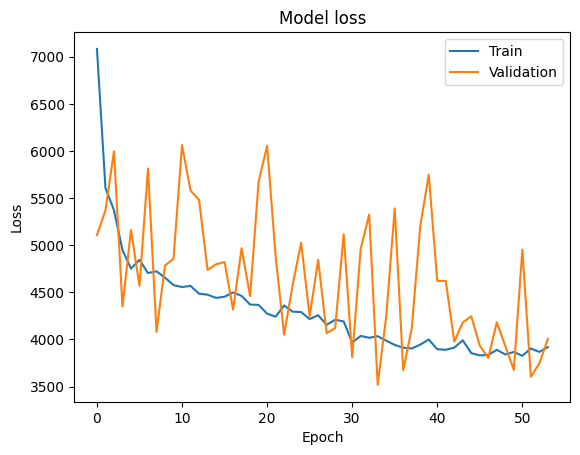

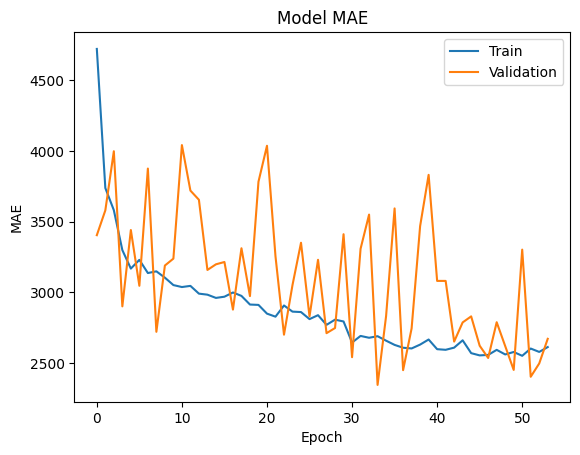

In [106]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation MAE values
plt.plot(model_history.history['mae'])
plt.plot(model_history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and y_pred are your true labels and predictions, respectively
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)
y_pred = Regressor.predict(X_test).flatten()  # Flatten if the output is in a different shape

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Mean Absolute Error: 2635.006591796875
Mean Squared Error: 10540093.0
Root Mean Squared Error: 3246.551025390625
R-squared: 0.01984485164414984


In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import tensorflow as tf

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
Regressor = Sequential()
Regressor.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
Regressor.add(Dropout(0.3))
Regressor.add(Dense(units=32, activation='relu'))
Regressor.add(Dropout(0.3))
Regressor.add(Dense(units=16, activation='relu'))
Regressor.add(Dropout(0.3))
Regressor.add(Dense(units=1, activation='linear'))

# Compile the model
opt = Adam(learning_rate=0.001)
Regressor.compile(optimizer=opt, loss=tf.keras.losses.Huber(delta=1.5), metrics=['mae'])

# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
model_history = Regressor.fit(X_train_scaled, y_train, validation_split=0.33, 
                              batch_size=32, epochs=1000, 
                              callbacks=[early_stopping, model_checkpoint])

# Evaluate the model on test data
y_pred = Regressor.predict(X_test_scaled).flatten()

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


C:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 12642.3818 - mae: 8429.0029 - val_loss: 11989.0859 - val_mae: 7993.4727
Epoch 2/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 10394.8232 - mae: 6930.6333 - val_loss: 2990.9160 - val_mae: 1994.6941
Epoch 3/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3757.5959 - mae: 2505.8140 - val_loss: 2353.5593 - val_mae: 1569.7889
Epoch 4/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3455.7720 - mae: 2304.5981 - val_loss: 2247.2974 - val_mae: 1498.9484
Epoch 5/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3480.5964 - mae: 2321.1479 - val_loss: 2179.2378 - val_mae: 1453.5748
Epoch 6/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3374.3398 - mae: 2250.3093 - val_loss: 2151.6914 - val_mae: 1435.2107
Epoch 7/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3266.1523 - mae: 2178.1851 - val_loss: 2082.8191 - val_mae: 1389.2959
Epoch 8/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3316.2783 

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3108.3369 - mae: 2072.9746 - val_loss: 1861.6969 - val_mae: 1241.8809
Epoch 51/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3174.8833 - mae: 2117.3389 - val_loss: 1827.8221 - val_mae: 1219.2979
Epoch 52/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3181.4438 - mae: 2121.7126 - val_loss: 1864.1263 - val_mae: 1243.5005
Epoch 53/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3124.6833 - mae: 2083.8721 - val_loss: 1817.1500 - val_mae: 1212.1840
Epoch 54/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3165.6458 - mae: 2111.1807 - val_loss: 1939.2771 - val_mae: 1293.6005
Epoch 55/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3164.5938 - mae: 2110.4790 - val_loss: 1874.0004 - val_mae: 1250.0833
Epoch 56/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3127.1160 - mae: 2085.4937 - val_loss: 1863.5297 - val_mae: 1243.1028
Epoch 57/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3156.4443 - mae: 210

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3081.8923 - mae: 2055.3450 - val_loss: 1821.9033 - val_mae: 1215.3522
Epoch 100/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3051.0085 - mae: 2034.7557 - val_loss: 1773.5023 - val_mae: 1183.0850
Epoch 101/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3112.6147 - mae: 2075.8259 - val_loss: 1879.4487 - val_mae: 1253.7157
Epoch 102/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3045.8411 - mae: 2031.3107 - val_loss: 1870.8904 - val_mae: 1248.0100
Epoch 103/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2972.7166 - mae: 1982.5612 - val_loss: 1828.5690 - val_mae: 1219.7953
Epoch 104/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3055.2659 - mae: 2037.5936 - val_loss: 1824.2191 - val_mae: 1216.8954
Epoch 105/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3075.2654 - mae: 2050.9268 - val_loss: 1816.5243 - val_mae: 1211.7662
Epoch 106/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3147.4973 - m

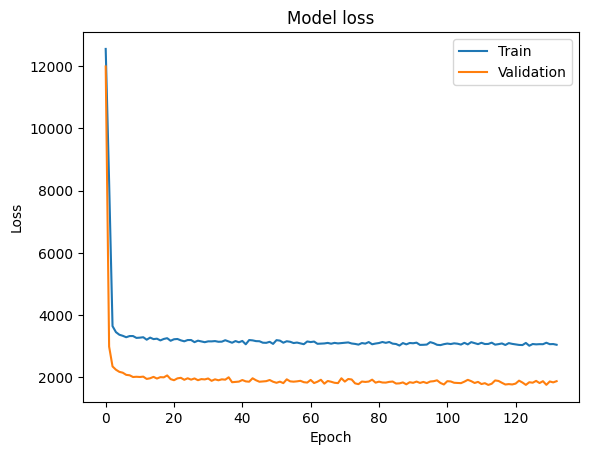

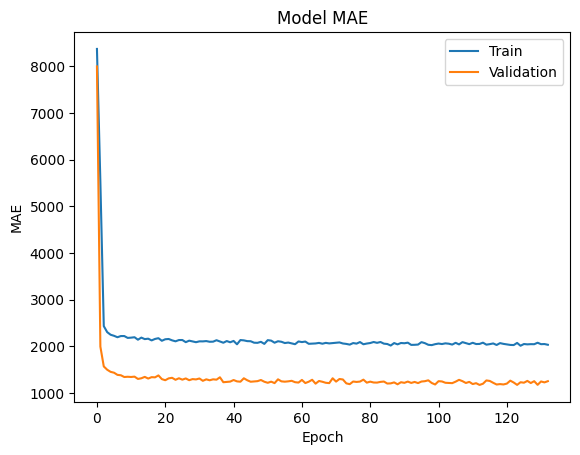

In [110]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation MAE values
plt.plot(model_history.history['mae'])
plt.plot(model_history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [111]:
from sklearn.preprocessing import StandardScaler

# Initialize scalers for X and y
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale X and y
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Define the model
Regressor = Sequential()
Regressor.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
Regressor.add(Dropout(0.3))
Regressor.add(Dense(units=32, activation='relu'))
Regressor.add(Dropout(0.3))
Regressor.add(Dense(units=16, activation='relu'))
Regressor.add(Dropout(0.3))
Regressor.add(Dense(units=1, activation='linear'))

# Compile the model
opt = Adam(learning_rate=0.001)
Regressor.compile(optimizer=opt, loss=tf.keras.losses.Huber(delta=1.5), metrics=['mae'])

# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
model_history = Regressor.fit(X_train_scaled, y_train_scaled, validation_split=0.33, 
                              batch_size=32, epochs=1000, 
                              callbacks=[early_stopping, model_checkpoint])

# Evaluate the model on test data
y_pred_scaled = Regressor.predict(X_test_scaled).flatten()

# Inverse transform the predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


C:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.4122 - mae: 0.7766 - val_loss: 0.2034 - val_mae: 0.5552
Epoch 2/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2729 - mae: 0.6116 - val_loss: 0.1693 - val_mae: 0.4979
Epoch 3/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2362 - mae: 0.5664 - val_loss: 0.1589 - val_mae: 0.4786
Epoch 4/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2129 - mae: 0.5326 - val_loss: 0.1513 - val_mae: 0.4648
Epoch 5/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1925 - mae: 0.5060 - val_loss: 0.1535 - val_mae: 0.4709
Epoch 6/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1867 - mae: 0.4992 - val_loss: 0.1529 - val_mae: 0.4693
Epoch 7/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1813 - mae: 0.4913 - val_loss: 0.1362 - val_mae: 0.4344
Epoch 8/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1771 - mae: 0.4790 - val_loss: 0.1391 - val_mae: 0.4430
Epoch 9/1000
150/150 ━━━━━━━━━━━━━━━━━━

Epoch 54/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1198 - mae: 0.3851 - val_loss: 0.1045 - val_mae: 0.3655
Epoch 55/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1204 - mae: 0.3853 - val_loss: 0.0978 - val_mae: 0.3390
Epoch 56/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1194 - mae: 0.3839 - val_loss: 0.1039 - val_mae: 0.3661
Epoch 57/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1209 - mae: 0.3908 - val_loss: 0.1027 - val_mae: 0.3602
Epoch 58/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1169 - mae: 0.3795 - val_loss: 0.1019 - val_mae: 0.3595
Epoch 59/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1180 - mae: 0.3838 - val_loss: 0.1051 - val_mae: 0.3662
Epoch 60/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1205 - mae: 0.3880 - val_loss: 0.1030 - val_mae: 0.3631
Epoch 61/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1207 - mae: 0.3894 - val_loss: 0.1011 - val_mae: 0.3576
Epoch 62/1000
150/150 ━━━━━━━━━━

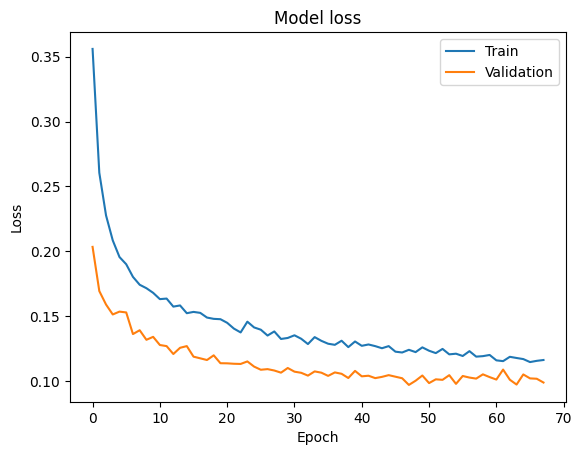

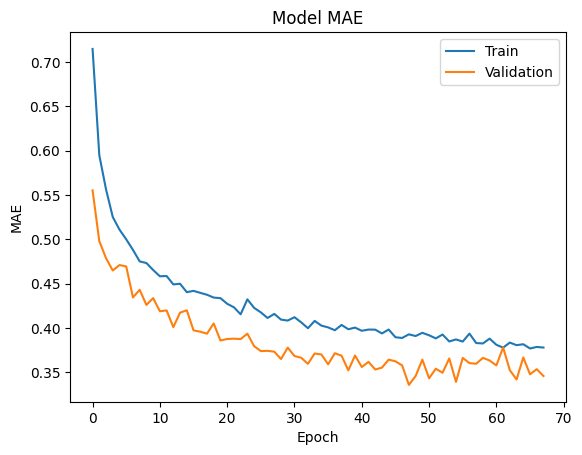

In [112]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation MAE values
plt.plot(model_history.history['mae'])
plt.plot(model_history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [113]:
Regressor = Sequential()
Regressor.add(Dense(units=128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
Regressor.add(Dropout(0.3))
Regressor.add(Dense(units=64, activation='relu'))
Regressor.add(Dropout(0.3))
Regressor.add(Dense(units=32, activation='relu'))
Regressor.add(Dropout(0.3))
Regressor.add(Dense(units=16, activation='relu'))
Regressor.add(Dropout(0.3))
Regressor.add(Dense(units=1, activation='linear'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
Regressor.compile(optimizer=opt, loss=tf.keras.losses.Huber(delta=1.5), metrics=['mae'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

model_history = Regressor.fit(X_train_scaled, y_train_scaled, validation_split=0.33, 
                              batch_size=32, epochs=1000, 
                              callbacks=[early_stopping, model_checkpoint])

# Evaluate the model on test data
y_pred_scaled = Regressor.predict(X_test_scaled).flatten()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


C:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.4642 - mae: 0.8318 - val_loss: 0.1953 - val_mae: 0.5450
Epoch 2/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2552 - mae: 0.5926 - val_loss: 0.1742 - val_mae: 0.5103
Epoch 3/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2255 - mae: 0.5495 - val_loss: 0.1557 - val_mae: 0.4696
Epoch 4/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1960 - mae: 0.5100 - val_loss: 0.1666 - val_mae: 0.5000
Epoch 5/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1883 - mae: 0.4961 - val_loss: 0.1576 - val_mae: 0.4839
Epoch 6/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1822 - mae: 0.4919 - val_loss: 0.1489 - val_mae: 0.4688
Epoch 7/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1780 - mae: 0.4827 - val_loss: 0.1564 - val_mae: 0.4791
Epoch 8/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1728 - mae: 0.4762 - val_loss: 0.1299 - val_mae: 0.4259
Epoch 9/1000
150/150 ━━━━━━━━━━━━━━━━━━

Epoch 54/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1127 - mae: 0.3738 - val_loss: 0.1016 - val_mae: 0.3538
Epoch 55/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1092 - mae: 0.3659 - val_loss: 0.1079 - val_mae: 0.3702
Epoch 56/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1159 - mae: 0.3816 - val_loss: 0.1016 - val_mae: 0.3546
Epoch 57/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1093 - mae: 0.3701 - val_loss: 0.1012 - val_mae: 0.3530
Epoch 58/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1120 - mae: 0.3735 - val_loss: 0.1036 - val_mae: 0.3630
Epoch 59/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1132 - mae: 0.3751 - val_loss: 0.1035 - val_mae: 0.3642
Epoch 60/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1096 - mae: 0.3694 - val_loss: 0.0999 - val_mae: 0.3397
Epoch 61/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1102 - mae: 0.3665 - val_loss: 0.1037 - val_mae: 0.3593
Epoch 62/1000
150/150 ━━━━━━━━━━

Epoch 107/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0999 - mae: 0.3503 - val_loss: 0.0981 - val_mae: 0.3465
Epoch 108/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1025 - mae: 0.3545 - val_loss: 0.1023 - val_mae: 0.3516
Epoch 109/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1067 - mae: 0.3602 - val_loss: 0.1056 - val_mae: 0.3616
Epoch 110/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0983 - mae: 0.3493 - val_loss: 0.0993 - val_mae: 0.3480
Epoch 111/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1032 - mae: 0.3524 - val_loss: 0.0964 - val_mae: 0.3394
Epoch 112/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1045 - mae: 0.3552 - val_loss: 0.0960 - val_mae: 0.3304
Epoch 113/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1003 - mae: 0.3519 - val_loss: 0.0942 - val_mae: 0.3257
Epoch 114/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0952 - mae: 0.3443 - val_loss: 0.0967 - val_mae: 0.3383
Epoch 115/1000
150/150 ━

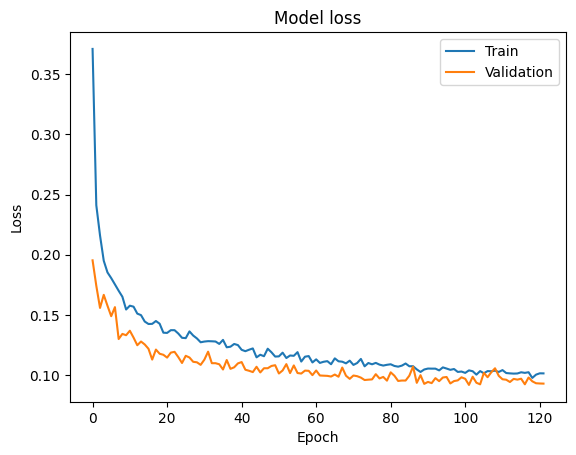

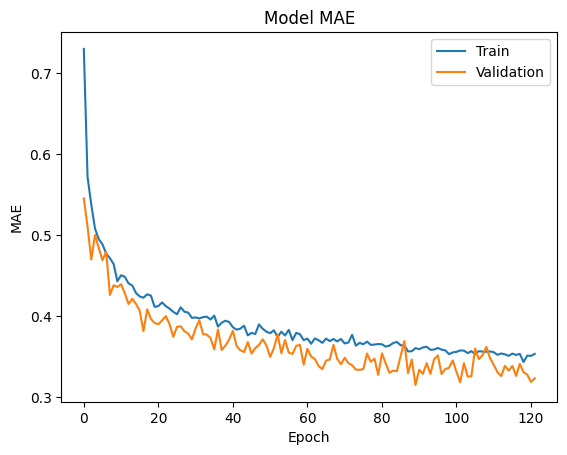

In [114]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation MAE values
plt.plot(model_history.history['mae'])
plt.plot(model_history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
